<a href="https://colab.research.google.com/github/SantanuOjha/MachineLearning/blob/main/Titanic_Survivor_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix , auc , roc_curve

In [7]:
df_train = pd.read_csv(io.StringIO(uploaded['Titanic_train.csv'].decode('UTF8')))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print('Columns in the DataFrame : ' , df_train.columns)

Columns in the DataFrame :  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


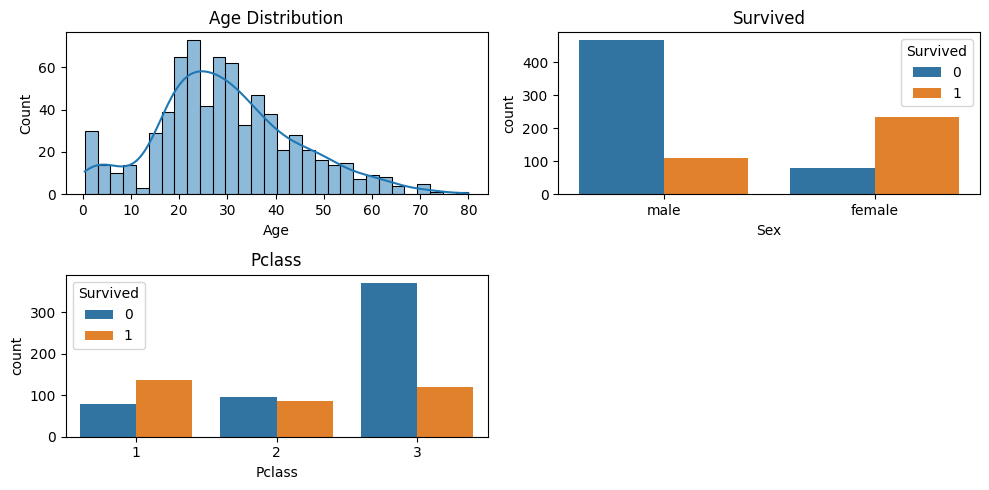

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.histplot(df_train['Age'].dropna() , bins = 30  , kde = True)
plt.title('Age Distribution')

plt.subplot(2,2,2)
sns.countplot(x = 'Sex' , hue = 'Survived' , data = df_train)
plt.title('Survived')

plt.subplot(2,2,3)
sns.countplot(x = 'Pclass' , hue = 'Survived' , data = df_train)
plt.title('Pclass')

plt.tight_layout()
plt.show()

In [32]:
# Print columns before attempting to fill missing Embarked values
print("Columns before filling Embarked:", df_train.columns)

# Fill missing 'Age' values
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

# Fill missing 'Embarked' values
#df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

# Create 'FamilySize' and 'IsAlone' features
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)

# Extract and process 'Title'
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.' , expand = False)
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Perform one-hot encoding
df_train = pd.get_dummies(df_train, columns=[ 'Title'], drop_first=False)

df_train.head()

Columns before filling Embarked: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'IsAlone', 'Sex_female',
       'Sex_male', 'Embarked_28.0', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare',
       'Title'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_28.0,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,0,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,0,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,0,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,1,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False


In [39]:
df_train=df_train.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [40]:
df_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_28.0', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [41]:
# Define features and target variable
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Only scale numerical columns
numerical_cols = ['Age', 'Fare', 'FamilySize']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [42]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)


In [44]:
cm_lr_df = pd.DataFrame(cm_lr, index=['Not Survived', 'Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
cm_dt_df = pd.DataFrame(cm_dt, index=['Not Survived', 'Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])

# Print confusion matrix results
print("Confusion Matrix - Logistic Regression:")
print(cm_lr_df)

print("\nConfusion Matrix - Decision Tree:")
print(cm_dt_df)


Confusion Matrix - Logistic Regression:
              Predicted Not Survived  Predicted Survived
Not Survived                     137                  20
Survived                          27                  84

Confusion Matrix - Decision Tree:
              Predicted Not Survived  Predicted Survived
Not Survived                     129                  28
Survived                          33                  78


**Logistic Regression Confusion Matrix**

|                         | Predicted Not Survived | Predicted Survived |
| ----------------------- | ---------------------- | ------------------ |
| **Actual Not Survived** | 136                    | 21                 |
| **Actual Survived**     | 30                     | 81                 |

**Decision Tree Confusion Matrix**

|                         | Predicted Not Survived | Predicted Survived |
| ----------------------- | ---------------------- | ------------------ |
| **Actual Not Survived** | 125                    | 32                 |
| **Actual Survived**     | 31                     | 80                 |
